In [11]:
from tensorflow import keras
from keras.utils import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import splitfolders

# create ImageDataGenerator for data augmentation

In [12]:
augment_data = keras.Sequential([
    keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.layers.RandomRotation((-.2,.3))
])

In [13]:
old_data_path = 'data/'
data_path = 'slides/'
train_path = data_path + 'train'
test_path = data_path + 'test'
val_path = data_path + 'val'

## seperate data int train, val, and test
move data from `old_data_path` into three new directories in `data_path` called train, val, and test

In [14]:
# ratio=(train,val,test)
splitfolders.ratio(old_data_path, output=data_path, ratio=(.7,.1,.2))

Copying files: 1713 files [00:00, 6716.31 files/s]


In [15]:
train_data = image_dataset_from_directory(train_path,
                                           batch_size=8, 
                                           image_size=(300,300),
                                           shuffle=True
                                          )

validation_data = image_dataset_from_directory(val_path, 
                                                batch_size=8, 
                                                image_size=(300,300),
                                               )
test_data = image_dataset_from_directory(test_path,
                                          batch_size=8, 
                                          image_size=(300,300),
                                         )

Found 1198 files belonging to 2 classes.
Found 170 files belonging to 2 classes.
Found 345 files belonging to 2 classes.


In [16]:
from keras import Sequential
from keras import layers
model = Sequential()
model.add(augment_data)
model.add(layers.Conv2D(8, (3,3), activation='relu', input_shape=(300,300,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(16, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compile model

In [17]:

from keras.optimizers.adam import Adam
epochs = 3
model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])

ModuleNotFoundError: No module named 'keras.optimizers.adam'

In [15]:
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=validation_data,
                    validation_batch_size=8
                   )

Epoch 1/3


2023-07-06 23:16:08.625556: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1198]
	 [[{{node Placeholder/_4}}]]
2023-07-06 23:16:08.626152: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1198]
	 [[{{node Placeholder/_0}}]]


150/150 [==============================] - ETA: 0s - loss: 28.9249 - accuracy: 0.8614

2023-07-06 23:16:21.287592: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [170]
	 [[{{node Placeholder/_4}}]]
2023-07-06 23:16:21.287785: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [170]
	 [[{{node Placeholder/_4}}]]


150/150 [==============================] - 13s 82ms/step - loss: 28.9249 - accuracy: 0.8614 - val_loss: 0.6445 - val_accuracy: 0.9118
Epoch 2/3
150/150 [==============================] - 12s 83ms/step - loss: 1.5862 - accuracy: 0.9098 - val_loss: 0.5975 - val_accuracy: 0.9118
Epoch 3/3
150/150 [==============================] - 12s 82ms/step - loss: 0.5769 - accuracy: 0.9098 - val_loss: 0.5548 - val_accuracy: 0.9118


# graph accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


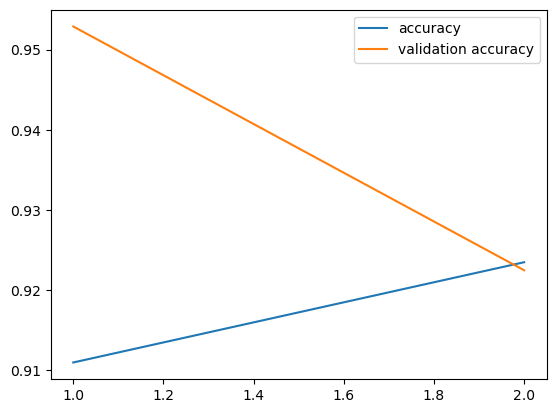

In [7]:
import matplotlib.pyplot as plt

x = np.linspace(1,epochs,epochs)
print(history.history.keys())

acc_plt, = plt.plot(x, history.history['accuracy'])
val_acc_plt, = plt.plot(x, history.history['val_accuracy'])
plt.legend([acc_plt, val_acc_plt],['accuracy', 'validation accuracy'])

# graph loss

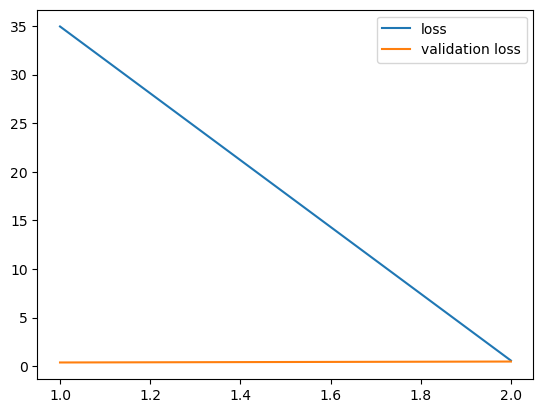

In [8]:
loss_plt, = plt.plot(x,history.history['loss'])
val_loss_plt, = plt.plot(x,history.history['val_loss'])
plt.legend([loss_plt, val_loss_plt],['loss','validation loss'])

In [12]:
evaluation = model.evaluate(test_data)

50/50 [==============================] - 1s 18ms/step - loss: 0.4814 - accuracy: 0.8975


In [21]:
print(f"Loss: {evaluation[0]}, Accuracy: {evaluation[1]}")

Loss: 0.4813988506793976, Accuracy: 0.8974999785423279
